<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du Cours TAL est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais.

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Rappels de Python: pour utiliser NLTK en Python, notamment dans un _notebook_ Jupyter, vous devez exécuter `import nltk`, ce qui vous permet d'accéder à toutes les commandes avec le préfixe `nltk`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements (faire `import nltk` puis `nltk.download()`).  Cela vous permettra de télécharger de nombreux corpus additionnels, mais que nous n'utiliserons pas dans ce laboratoire.

In [41]:
import nltk
import os
#from nltk.book import *

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\massi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**1a.** Écrivez une liste de mots (strings) que vous appelerez `sentence1`, formant une phrase en anglais.

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, triez les bi-grammes par ordre alphabétique et affichez le résultat.

In [42]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
sentence1 = ["i", "love", "cheeseburgers", "and", "fries"]

print(len(sentence1))

bigrams = nltk.bigrams(sentence1)
print(sorted(list(bigrams)))


5
[('and', 'fries'), ('cheeseburgers', 'and'), ('i', 'love'), ('love', 'cheeseburgers')]


**1b.** Définissez maintenant une chaîne unique appelée `string2` contenant une phrase, incluant par exemple des ponctuations.  

Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [43]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
string2 = "I love cheeseburgers and fries !"
sentence2 = nltk.word_tokenize(string2)

print(sentence2)

['I', 'love', 'cheeseburgers', 'and', 'fries', '!']


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

**2a.** Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stockez son contenu dans une chaîne et affichez sa longueur.

In [44]:
from urllib import request
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)
len(raw)
raw[:75]

'*** START OF THE PROJECT GUTENBERG EBOOK 2554 ***\n\n\n\n\nCRIME AND PUNISHMENT\n'

**2b.** En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder uniquement le texte principal du roman.  Vous pouvez utiliser la notation dite de *slicing* en Python, et essayer de localiser des chaînes qui indiquent où commence et finit le véritable texte. Quelle est la longueur de ce texte en caractères ?  

Si vous avez des problèmes avec les retours à la ligne, pensez à les remplacer avec la fonction `.replace(..., ...)`.  Si vous avez des problèmes d'encodage, voir le [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).

In [45]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
indexBegin = raw.find('PART I')
print(indexBegin)
indexEnd = raw.find('*** END OF')
print(indexEnd)


interestingText = raw[indexBegin:indexEnd]

#Check si le début est bien dedans !
print(interestingText[:50])

#Check si la fin est bien dedans !
interestingText[len(interestingText) - 50:] 



4638
1135166
PART I



CHAPTER I

On an exceptionally hot eveni


'of a new story, but our present story is\nended.\n\n\n'

**2c.** Veuillez maintenant segmenter le texte en phrases avec NLTK, et afficher le nombre de phrases obtenues, ainsi qu'un court extrait de 4 phrases. 

Puis veuillez écrire les phrases dans un nouveau fichier, avec une phrase par ligne.

Comment appréciez-vous la qualité de la segmentation ?  Veuillez écrire votre appréciation dans une nouvelle cellule ci-dessous.

**Indications :**
* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`
* vous aurez besoin de la fonction de nltk (vue en cours) appelée `nltk.sent_tokenize(...)` qui est documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize) (rappel : le nom "sentence tokenize" n'est pas très logique).

In [87]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
# Enlever les \n
interestingTextCleaned = interestingText.replace('\n', ' ')

sentences = nltk.sent_tokenize(interestingTextCleaned)

print("Nombre de phrases tokenisées :", len(sentences))

print("Extrait de 4 phrases tokenisées :")
for i, tokens in enumerate(sentences[1:5], start=2):
    print(f"Phrase {i} :", tokens)

Nombre de phrases tokenisées : 11903
Extrait de 4 phrases tokenisées :
Phrase 2 : He had successfully avoided meeting his landlady on the staircase.
Phrase 3 : His garret was under the roof of a high, five-storied house and was more like a cupboard than a room.
Phrase 4 : The landlady who provided him with garret, dinners, and attendance, lived on the floor below, and every time he went out he was obliged to pass her kitchen, the door of which invariably stood open.
Phrase 5 : And each time he passed, the young man had a sick, frightened feeling, which made him scowl and feel ashamed.


In [79]:
filename1 = "sample_text_1.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)


with open(filename1, "a", encoding="utf8") as fd:
    fd.write("\n".join(sentences) + "\n")

In [48]:
# Votre appréciation de la qualité ici :
## Ca m'a l'air OK, sauf lorsqu'il y a des parties ou des titres, ils se collent à la phrase suivante !

**2d.** Veuillez maintenant segmenter chaque phrase du (2c) en tokens (mots et ponctuations).  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez le nombre total de _tokens_. Puis, affichez 4 phrases et commentez la qualité de la tokenisation.  Veuillez également créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  

Vous aurez besoin de la fonction de nltk (vue en cours) appelée `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize)).

In [80]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
total_tokens = sum(len(tokens) for tokens in tokenized_sentences)
print("Nombre total de tokens (segmentation phrase par phrase) :", total_tokens)

# Affichage d'un extrait de 4 phrases tokenisées (par exemple, phrases 6 à 9)
print("Extrait de 4 phrases tokenisées :")
for i, tokens in enumerate(tokenized_sentences[1:5], start=2):
    print(f"Phrase {i} :", tokens)

print(tokenized_sentences[0:2])

Nombre total de tokens (segmentation phrase par phrase) : 252755
Extrait de 4 phrases tokenisées :
Phrase 2 : ['He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase', '.']
Phrase 3 : ['His', 'garret', 'was', 'under', 'the', 'roof', 'of', 'a', 'high', ',', 'five-storied', 'house', 'and', 'was', 'more', 'like', 'a', 'cupboard', 'than', 'a', 'room', '.']
Phrase 4 : ['The', 'landlady', 'who', 'provided', 'him', 'with', 'garret', ',', 'dinners', ',', 'and', 'attendance', ',', 'lived', 'on', 'the', 'floor', 'below', ',', 'and', 'every', 'time', 'he', 'went', 'out', 'he', 'was', 'obliged', 'to', 'pass', 'her', 'kitchen', ',', 'the', 'door', 'of', 'which', 'invariably', 'stood', 'open', '.']
Phrase 5 : ['And', 'each', 'time', 'he', 'passed', ',', 'the', 'young', 'man', 'had', 'a', 'sick', ',', 'frightened', 'feeling', ',', 'which', 'made', 'him', 'scowl', 'and', 'feel', 'ashamed', '.']
[['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'e

In [61]:
filename2 = "sample_text_2.txt"
if os.path.exists(filename2):
    os.remove(filename2)
with open(filename2, "w", encoding="utf8") as fd:
    for tokens in tokenized_sentences:
        fd.write(" ".join(tokens) + "\n")

In [ ]:
# Votre appréciation de la qualité ici :
## C'est très bien, or les ponctuations ont été séparées des mots. C'est un peu bizarre, mais ça reste "correct".
## Toutefois, on peut remarquer que les abréviations n'ont pas été séparées de leur point, ce qui est bien.

**2e.** Veuillez maintenant tokeniser un texte sans le segmenter préalablement en phrases, en effectuant la tokenisation directement sur la chaîne de caractères contenant tout le texte.  Veuillez afficher un court extrait de 50 tokens. 

Veuillez afficher le nombre total de tokens : est-ce qu'il est identique au total obtenu au (2d) ?  

Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [66]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
# 3a. Créer un objet nltk.Text à partir de la liste des tokens
all_tokens = nltk.word_tokenize(interestingTextCleaned)
print("Extrait de 50 tokens (tokenisation directe) :", all_tokens[:50])
print("Nombre total de tokens (tokenisation directe) :", len(all_tokens))
print("Nombre total de tokens (segmentation phrase par phrase) :", total_tokens)

Extrait de 50 tokens (tokenisation directe) : ['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.', 'He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase']
Nombre total de tokens (tokenisation directe) : 252755
Nombre total de tokens (segmentation phrase par phrase) : 252755


In [89]:
# Votre réponse à la question ici :
# Le nombre de tokens reste le même, mais on pert l'information des phrases. 
# C'est à dire, on ne sait plus où commence et où finit une phrase. On pourrait les retrouver avec la ponctuation.
# Mais ça reste très bien!

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  

Les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`.

Les objets `nltk.Text` peuvent en principe être créés avec : 
1. la chaîne de caractères constituant le texte (string)
2. la liste de tous les mots du texte (tableau de string)
3. la liste de toutes les phrases (tableau de listes de string)

**Seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`.**


**3a.** Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  Vous pouvez appeler ici de nouveau la fonction `nltk.word_tokenize` ou réutiliser le résultat du (2e).  Il n'y a rien à afficher ici.

In [109]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text = nltk.Text(all_tokens)

**3b.** Veuillez afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`.  Cette méthode est décrite au
 [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) qui montre aussi d'autres exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.

In [110]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text.concordance("affection")

Displaying 2 of 2 matches:
beziatnikov , who felt a return of affection for Pyotr Petrovitch . “ And , wha
sure that it was only your special affection for my poor husband that has made 


**3c.** Veuillez trouver les 10 mots qui ont les contextes les plus semblables à un mot de votre choix, en utilisant la méthode `similar`.  Cette méthode est aussi décrite au [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html).  Est-ce que les mots ayant des contextes semblables sont aussi semblables par le sens au mot choisi ?

In [189]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
text.similar("affection", 10)

place as it character them you me yourself thirst bread


In [112]:
# Votre réponse à la question ici :
# Pas incroyable ?

**3d.** En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations (couples de mots) les plus fréquentes dans votre texte.

In [115]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
# nltk.download('stopwords')
text.collocation_list(10)

[('Katerina', 'Ivanovna'),
 ('Pyotr', 'Petrovitch'),
 ('Pulcheria', 'Alexandrovna'),
 ('Avdotya', 'Romanovna'),
 ('Rodion', 'Romanovitch'),
 ('Marfa', 'Petrovna'),
 ('Sofya', 'Semyonovna'),
 ('old', 'woman'),
 ('Porfiry', 'Petrovitch'),
 ('Amalia', 'Ivanovna')]

**3e.** On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste de ses _types_) simplement en convertissant la liste des _tokens_ déjà obtenue dans une variable de type `set` en Python.  
* Veuillez obtenir ainsi le vocabulaire de votre texte.
* Combien de mots différents y a-t-il dans le vocabulaire, en incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [192]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
token_set = set(all_tokens)
print("Nombre de tokens uniques :", len(token_set))
vocab_sorted_by_length = sorted(token_set, key=len, reverse=True)
top_20_tokens = vocab_sorted_by_length[:20]
print("20 premiers tokens uniques (hors stopwords) :", top_20_tokens)
print("Nombre de mots composés :", len([w for w in top_20_tokens if "-" in w]))

Nombre de tokens uniques : 11011
20 premiers tokens uniques (hors stopwords) : ['grey-and-rainbow-coloured', 'frightened-looking', 'Schleswig-Holstein', 'disproportionately', 'well-proportioned', 'indistinguishable', 'cross-examination', 'Cough-cough-cough', '_psychologically_', 'enthusiastically', 'terrible-looking', '_Hof-kriegsrath_', 'pawnbroker-woman', 'misunderstanding', 'poverty-stricken', 'superciliousness', 'self-confidently', 'delicate-looking', 'governor-general', 'disproportionate']
Nombre de mots composés : 13


In [ ]:
# Votre réponse à la question ici :
# La plupart des mots ce sont des noms composés

**3f.** Veuillez construire la distribution de fréquences de votre texte, en utilisant un objet `FreqDist`, et utilisez-là pour afficher les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

Indication : NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text` en les stockant dans un objet de type `FreqDist` (pour _frequency distribution_) comme expliqué dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de cet objet, on peut déterminer les mots les plus fréquents.

In [142]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
freq_dist = nltk.FreqDist(all_tokens)
most_common_70 = freq_dist.most_common(70)
print("70 tokens les plus fréquents :", most_common_70)
words_top_70_4_chars = [word for word, count in most_common_70 if len(word) > 4]
print("Mots de plus de 4 caractères parmi les 70 tokens les plus fréquents :", words_top_70_4_chars)

70 tokens les plus fréquents : [(',', 16004), ('.', 8754), ('the', 7243), ('and', 6182), ('to', 5174), ('I', 4392), ('a', 4391), ('’', 4034), ('“', 3971), ('”', 3922), ('of', 3704), ('he', 3510), ('you', 3420), ('that', 3038), ('in', 3020), ('it', 2889), ('was', 2780), ('!', 2363), ('?', 2277), ('his', 1977), ('at', 1928), ('her', 1768), ('s', 1745), ('not', 1736), ('with', 1671), ('for', 1573), ('had', 1569), ('him', 1560), ('on', 1417), ('is', 1364), ('she', 1249), ('He', 1231), ('all', 1208), ('as', 1133), ('t', 1132), ('but', 1110), ('be', 1108), ('have', 1103), ('...', 1083), (';', 1046), ('me', 1040), ('are', 815), ('so', 792), ('Raskolnikov', 782), ('what', 751), ('And', 747), ('my', 742), ('were', 700), ('from', 696), ('But', 683), ('....', 683), ('out', 671), ('--', 663), ('up', 640), ('your', 628), ('they', 597), ('there', 597), ('You', 590), ('them', 583), ('this', 579), ('been', 576), ('one', 574), ('would', 552), ('The', 535), ('am', 532), ('an', 529), ('will', 525), ('abo

## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

**4a.** Veuillez afficher le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

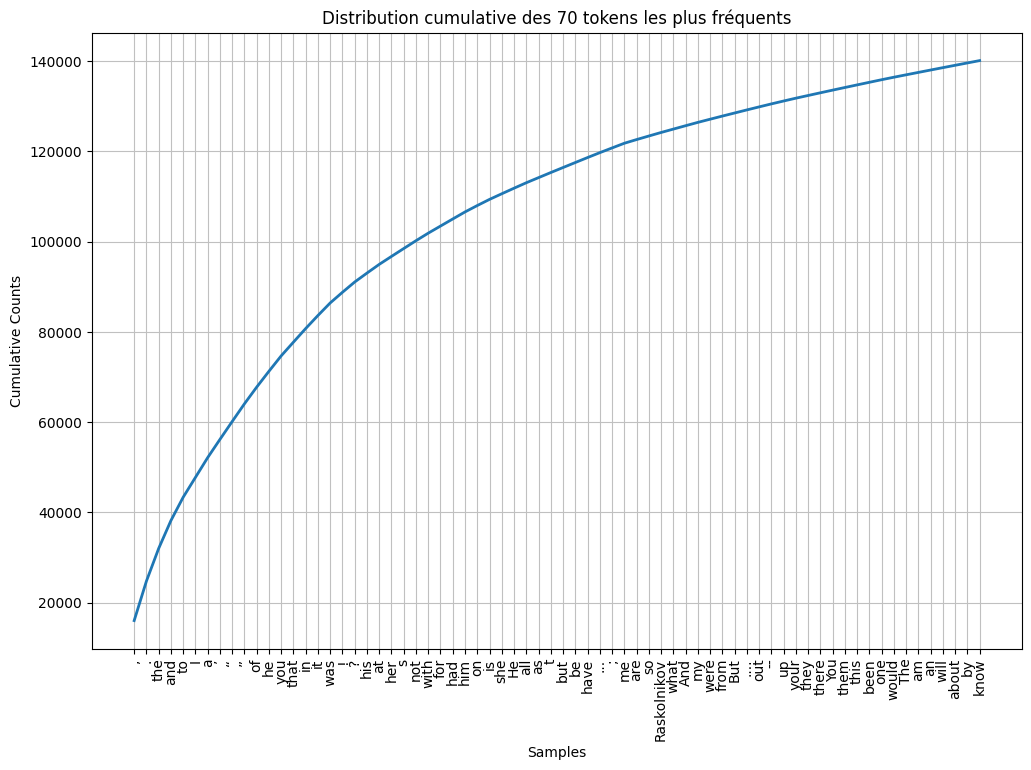

In [154]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
plt.figure(figsize=(12, 8)) 
freq_dist.plot(70, cumulative=True, title="Distribution cumulative des 70 tokens les plus fréquents")
plt.show()

**4b.** Veuillez construir une liste avec la longueur de chaque _token_ du texte.  La liste aura donc autant de nombres que de tokens.  Veuillez créer un nouvel objet `FreqDist` à partir de cette liste de nombres, et affichez la distribution _non-cumulative_ des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

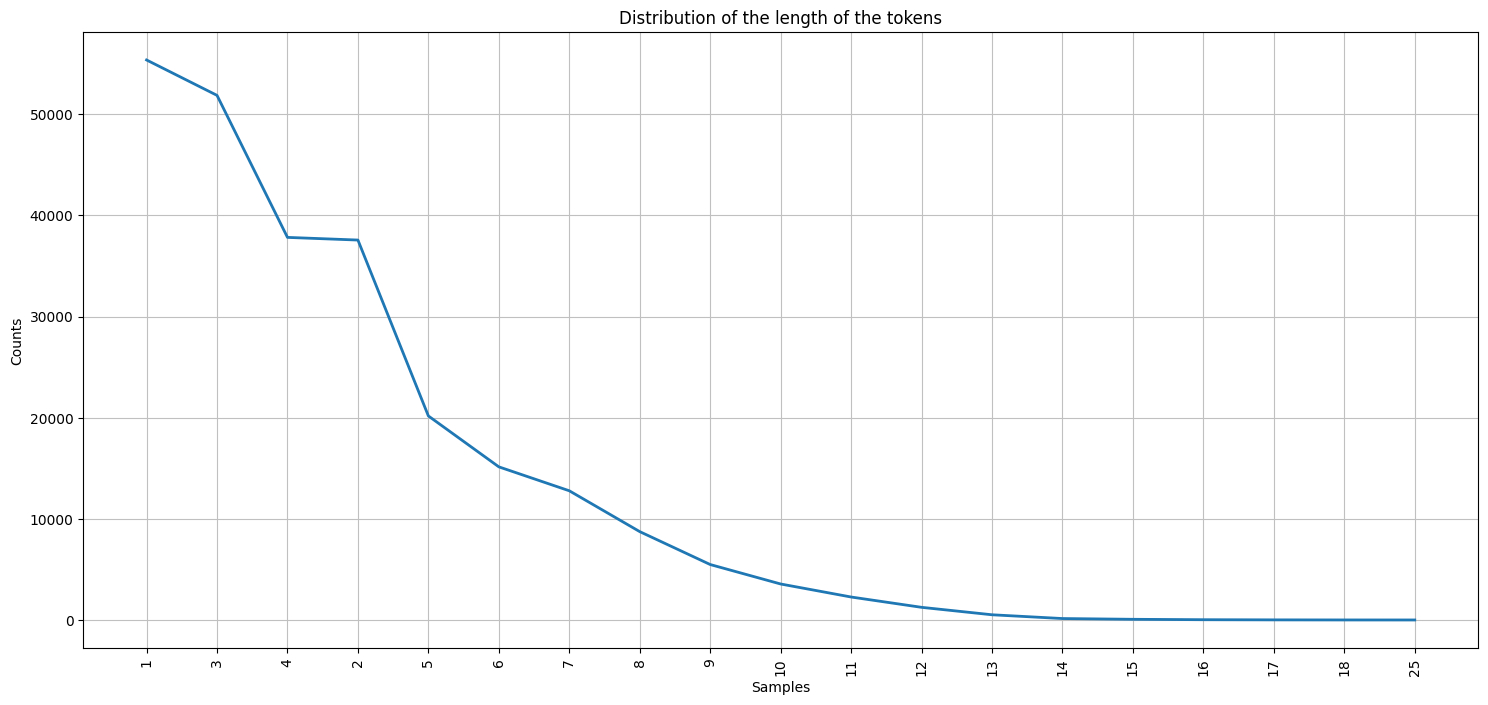

Longueur la plus fréquente des tokens : 1
Nombre de tokens de longueur 1 : 55363


In [178]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
tokens_length = [len(token) for token in all_tokens]
fdist2 = nltk.FreqDist(tokens_length)

plt.figure(figsize=(18, 8))
fdist2.plot(title="Distribution of the length of the tokens")
plt.show()
print("Longueur la plus fréquente des tokens :", fdist2.max())
print("Nombre de tokens de longueur 1 :", fdist2[1])

In [ ]:
# Vos réponses aux deux questions ici :
# C'est logiquement une courbe décroissante, car il y a plus de tokens courts que de tokens longs.
# La longueur la plus fréquente des tokens est 1. Le nombre de tokens de longueur 1 est 55363.

**4c.** Veuillez générer la liste des fréquences des mots de votre texte par ordre décroissant (sans les mots, seulement les valeurs des fréquences).  Limitez cette liste à *N* valeurs (par exemple *N* = 100).  Affichez avec `matplotlib.pyplot.plot` la courbe en fonction du rang, c'est-à-dire le rang (1, 2, 3, ..., **) sur l'axe *x* et la fréquence sur l'axe *y*.

Note : on génère directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

Ajoutez une deuxième courbe (dans la même commande `plot`) selon la formule *y* = *a* / (*x* + *b*) en choississant par essais successifs des valeurs de *a* et *b* qui vous rapprochent autant que possible de la courbe des fréquences.  Cette formule est appelée *Loi de Zipf* et illustre une propriété du vocabulaire d'un échantillon suffisamment grand de texte.

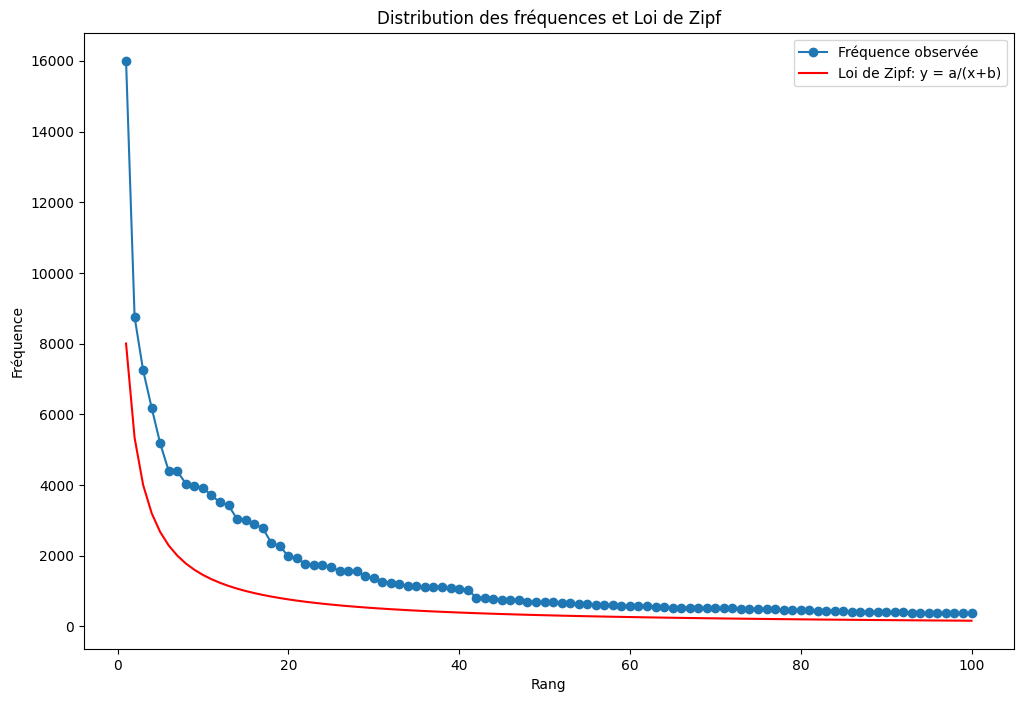

In [200]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
sorted_freq = sorted(freq_dist.values(), reverse=True)[:100]
x = list(range(1, len(sorted_freq) + 1))
# Affichez avec `matplotlib.pyplot.plot` la courbe en fonction du rang
plt.figure(figsize=(12, 8))
# Tracer la courbe observée
plt.plot(x, sorted_freq, marker='o', label="Fréquence observée")

# Définir les paramètres de la loi de Zipf : y = a/(x + b)
# Ici, a est choisi égal à la fréquence maximale observée et b = 1 (vous pouvez ajuster ces valeurs pour un meilleur fit)
a = sorted_freq[0]
b = 1
zipf_curve = [a / (rank + b) for rank in x]

# Tracer la courbe de la loi de Zipf
plt.plot(x, zipf_curve, label="Loi de Zipf: y = a/(x+b)", color='red')

plt.xlabel("Rang")
plt.ylabel("Fréquence")
plt.title("Distribution des fréquences et Loi de Zipf")
plt.legend()
plt.show()

## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ en ajoutant vos deux noms.  Puis ajoutez-le dans une archive _zip_ avec le _notebook_ de la partie 1c, et soumettez l'archive sur Cyberlearn. 